<div style="color: #40E0D0; font-family: Cambria, serif; text-align: center; margin: 20px;">

<div style="font-size: 32px; font-weight: bold; margin-bottom: 15px;">UBS AG $4,593,000 Trigger Callable Contingent Yield Notes</div>

<div style="font-size: 24px; font-weight: bold; margin-bottom: 15px;">Linked to the common stock of U.S. Bancorp due August 13, 2026</div>

<div style="font-style: italic; font-size: 16px;">-Valuation report Python notebook by Yadvesh, Krish and Mayank</div>

</div>

#### Group Members (NetID)
* Krish Desai (kcdesai2)
* Mayank Kalra (mkalra2)
* Yadvesh Yadav (yyada)

----

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">I) Introduction ==></span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Below are the Key Dates of the Note:</span>
</div>

![](./Images/key_dates.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Below are the Note Offering:</span>
</div>

![](./Images/note_offering.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Below are the Observation Dates and Coupon Payment Dates:</span>
</div>

![](./Images/obs_cpn_dates.png)

-----

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">II) Bloomberg Data (Risk-Free Rates(OIS), Dividend Yield, Volatality Matrix) is as follows ==> </span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Risk Free Rate (OIS Rate):</span>
</div>

![](./Images/usd-ois.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Dividend Yield:</span>
</div>

![](./Images/div.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Implied Volatality Matrix:</span>
</div>

![](./Images/vols.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">III) Getting the Risk-free rates from discount factors above ==></span>
</div>

In [1]:
# Importing Necessary Libraries
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# function to get fractional difference between two dates
def get_year_fraction(start_date, end_date):
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    days_diff = (end_date - start_date).days
    
    year_frac = days_diff / 365
    
    return year_frac

In [3]:
# Key dates
T_0 = "2024-08-08"
T_1 = "2024-08-13"
T_2 = "2026-08-10"
T_3 = "2026-08-13"

# Discount Factors at Key Dates
DF_0 = 1
DF_2 = 0.928096

# DF_1 and DF_3 needs to be calculated using Interpolation
# We have:
dt_2024_08_15 = "2024-08-15"
DF_2024_08_15 = 0.998968
dt_2027_08_09 = "2027-08-09"
DF_2027_08_09 = 0.900124

# Now using Interpolation we have:
DF_1 = DF_0 + (DF_2024_08_15 - DF_0)*(get_year_fraction(T_1, T_0))/(get_year_fraction(dt_2024_08_15, T_0))
print(f"The Value of DF_1 is: {DF_1:.6f}\n")
DF_3 = DF_2 + (DF_2027_08_09 - DF_2)*(get_year_fraction(T_3, T_2))/(get_year_fraction(dt_2027_08_09, T_2))
print(f"The Value of DF_3 is: {DF_3:.6f}")

The Value of DF_1 is: 0.999263

The Value of DF_3 is: 0.927865


<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        |
|------|-----------|-----------|
| T_0  | 8/8/2024  | 1.000000  |
| T_1  | 8/13/2024 | 0.999263  |
| T_2  | 8/10/2026 | 0.928096  |
| T_3  | 8/13/2026 | 0.927865  |

</div>

In [4]:
# function to get r(0,T) from the discount factors DF
def r_from_DF(DF, T, T_0):
    dt = get_year_fraction(T_0, T)
    r = -np.log(DF)/dt
    return r, dt

In [5]:
r_T0_T1, T0_T1 = r_from_DF(DF_1, T_1, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: {r_T0_T1:.8f}\n")
r_T0_T2, T0_T2 = r_from_DF(DF_2, T_2, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: {r_T0_T2:.8f}\n")
r_T0_T3, T0_T3 = r_from_DF(DF_3, T_3, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: {r_T0_T3:.8f}\n")

The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: 0.05383127

The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: 0.03720811

The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: 0.03717961



<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   |
|------|-----------|-----------|-----------------|------------|
| T_0  | 8/8/2024  | 1.000000  | 0.00000000     | 0.00000000 |
| T_1  | 8/13/2024 | 0.999263  | 0.01369863     | 0.05383127 |
| T_2  | 8/10/2026 | 0.928096  | 2.00547945     | <span style="background-color: green;">0.03720811</span> |
| T_3  | 8/13/2026 | 0.927865  | 2.01369863     | 0.03717961 |

</div>

In [6]:
# Now we need to calculate teh forward rate F(T_1,T_3)
T1_T3 = get_year_fraction(T_1, T_3)
F_T1_T3 = ((r_T0_T3*T0_T3) - (r_T0_T1*T0_T1))/T1_T3
print(f"The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: {F_T1_T3:.8f}\n")

The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: 0.03706556



---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) The Discount Factor Table after Linear Interpolation Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   | F(T_x1,T_x2)   |
|------|-----------|-----------|-----------------|------------|------------|
| T_0  | 8/8/2024  | 1.000000  | 0.00000000     | 0.00000000 | -  |
| T_1  | 8/13/2024 | 0.999263  | 0.01369863     | 0.05383127 | -  |
| T_2  | 8/10/2026 | 0.928096  | 2.00547945     | <span style="background-color: green;">0.03720811</span> | -  |
| T_3  | 8/13/2026 | 0.927865  | 2.01369863     | 0.03717961 | <span style="background-color: green;">0.03706556</span> |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) The continuous dividend yield 'D' from bloomberg data is 4.842% or 0.04842</span>
</div>

---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) The Moneyness and Volatility Matrix Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Moneyness | Implied Volatility (24M) |
|-----------|------------------|
| 60.00     | 37.779%         |
| 65.00     | 36.529%         |
| 70.00     | 34.846%         |
| 75.00     | 33.187%         |
| 80.00     | 31.841%         |
| 85.00     | 30.770%         |
| 90.00     | 29.896%         |
| 95.00     | 29.334%         |
| 100.00    | 28.662%         |
| 105.00    | 28.035%         |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">IV) Now Calculating the Value of the Note using Binomial Trees ==></span>
</div>

In [7]:
# note features that will go in the functions to callculate teh value of the note

# initial stock price ($)
S0 = 41.76

# coupon barrier and downside threshold ($)
B = 0.6*S0

# contingent coupon per observation date ($)
coupon_payment = 25.625

# principal amount per note ($)
principal = 1000

# share delivery coefficient if below downside threshold at maturity
share_delivery_amount = 23.9464

# continously compounded risk-free rate(T_0 to T_2) for p calculation
r1 = r_T0_T2

# continously compounded forward rate(T_1 to T_3) for discounting
r2 = F_T1_T3

# continuous dividend yield
D = 0.04842

# implied volatility at 80 Moneyness
sigma = 0.31841

# number of time steps
N = 1000

# fractional time between T_0 and T_2 for p calculation
T0_T2

# fractional time between T_1 and T_3 for discounting
T1_T3

2.0

In [8]:
sigma_moneyness = {
    60.00: 0.37779,
    65.00: 0.36529,
    70.00: 0.34846,
    75.00: 0.33187,
    80.00: 0.31841,
    85.00: 0.30770,
    90.00: 0.29896,
    95.00: 0.29334,
    100.00: 0.28662,
    105.00: 0.28035
}

### We will calculate Note Value using the following binomial lattice methods.
* Cox, Ross and Rubinstein, 1979, CRR ==> ($u = e^{\sigma\Delta t}, d = 1/u$)
* Rendleman and Bartter, 1979, RB ==> ($u = \exp((r-\delta-0.5\sigma^2)\Delta t+\sigma\sqrt{\Delta t}), d = \exp((r-\delta-0.5\sigma^2)\Delta t-\sigma\sqrt{\Delta t})$)
* Leisen and Reimer, 1996 (see Lecture 5 notes), LR ==>
  - $q = h(d_2)$
  - $u = e^{(r-\delta)\Delta t}\frac{q*}{q}$
  - $d = \frac{e^{(r-\delta)\Delta t} - qu}{1 - q}$


Where:

$d_{1,2} = \frac{\ln(S/K) + (r - \delta \pm \frac{1}{2}\sigma^2)(T)}{\sigma\sqrt{(T)}}$

$h(x) = \frac{1}{2} + sign(x)\sqrt{\frac{1}{4} - \frac{1}{4}\exp\left\{-\left(\frac{x}{N+\frac{1}{3}}\right)^2\left(N+\frac{1}{6}\right)\right\}}$

$q* = h(d_1)$

In [9]:
# defining h(x) function for Leisen-Reimer model
def h(x, N):
    func_value = 0.5 + np.sign(x) * np.sqrt(0.25 - 0.25 * np.exp(-((x / (N + 1/3)) ** 2) * (N + 1/6)))
    return func_value

In [10]:
# function to build the stock tree
def Stock_tree(N, S0, B, sigma, r1, D, T0_T2, model):

    S = np.zeros([N+1, N+1])
    dt02 = T0_T2/N

    # choice of model
    if model == 'CRR':
        u = np.exp(sigma*np.sqrt(dt02))
        d = np.exp(-sigma*np.sqrt(dt02))
        p = (np.exp((r1-D)*dt02)-d)/(u-d)

    elif model == 'RB':
        u = np.exp((r1 - D - 0.5*sigma**2)*dt02 + sigma*np.sqrt(dt02))
        d = np.exp((r1 - D - 0.5*sigma**2)*dt02 - sigma*np.sqrt(dt02))
        p = (np.exp((r1-D)*dt02)-d)/(u-d)

    elif model == 'LR':
        d1 = (np.log(S0/B) + (r1 - D + 0.5*sigma**2)*T0_T2)/(sigma*np.sqrt(T0_T2))
        d2 = d1 - sigma*np.sqrt(T0_T2)
        q1 = h(d2, N)
        q2 = h(d1, N)
        u = np.exp((r1 - D) * dt02) * (q2 / q1)
        d = (np.exp((r1 - D) * dt02) - q1 * u) / (1 - q1)
        p = q1

    # setting S0 as initial stock price
    S[0, 0] = S0

    # building the stock tree
    for i in range(1, N + 1):
        S[i,0] = S[i-1,0] * d
        for j in range(1,i+1):
            S[i,j] = S[i-1,j-1] * u

    return S, p, u, d, model

In [11]:
# function to calculate the value of the note
def Note_Value(S, p, N, sigma, T0_T2, T1_T3, r2, model):

    dt02 = T0_T2/N
    dt13 = T1_T3/N

    # getting the call start step after which the note becomes callable (6 months)
    # call start date  after 6 months from "2024-08-08" is "2025-02-08"
    call_start_date = "2025-02-08"
    call_start_time = get_year_fraction(T_0, call_start_date)      
    call_start_step = int(call_start_time/dt02)

    # coupon dates stored as list to be used in function to give out coupon payments at these dates if stock is greater than coupon barrier
    observation_dates = [
        '2024-11-08',
        '2025-02-10',
        '2025-05-08',
        '2025-08-08',
        '2025-11-10',
        '2026-02-09',
        '2026-05-08'
    ]

    # calculating observation times (year fractions from T_0)
    observation_times = [get_year_fraction(T_0, date) for date in observation_dates]

    # calculate observation steps (the steps at which observation dates occur)
    observation_steps = [int(time / dt02) for time in observation_times]

    value_tree = np.zeros_like(S)

    # determine Payoffs at Maturity
    for j in range(N+1):
        S_T = S[N, j]
        if S_T >= B:
            # receive principal back plus coupon if above barrier
            value_tree[N, j] = principal + coupon_payment
        else:
            # receive share delivery amount times stock price
            value_tree[N, j] = share_delivery_amount*S_T

    # applying backward Induction
    for i in range(N-1, -1, -1):
        for j in range(i + 1):
            S_t = S[i, j]

            # calculating expected continuation value
            continuation_value = np.exp(-r2 * dt13)*(p*value_tree[i+1, j+1] + (1-p)*value_tree[i+1, j])

            # add contingent coupon if barrier is breached
            if i in observation_steps and S_t >= B:
                continuation_value = continuation_value + coupon_payment

            elif i in observation_steps:
                continuation_value = continuation_value

            # check if issuer will call the note
            if i in observation_steps and i >= call_start_step:
                # calculate call payoff
                call_payoff = principal + coupon_payment

                # issuer will call if continuation value is larger than call_payoff
                node_value = min(call_payoff, continuation_value)

            else:
                node_value = continuation_value

            value_tree[i, j] = node_value

    # discounting back to the note's present value
    note_value = value_tree[0, 0]

    moneyness = next(k for k, v in sigma_moneyness.items() if v == sigma)
    print(f"The estimated fair value of the note at moneyness of {moneyness} for {N} time steps and {model} model is: ${note_value:.4f}")
    return note_value

In [12]:
# build the stock tree for N=1000 time steps CRR model
S, p, u, d, model = Stock_tree(N, S0, B, sigma, r1, D, T0_T2, model="CRR")

In [13]:
# calculate the value of the note for N=1000 time steps CRR model
note_value = Note_Value(S, p, N, sigma, T0_T2, T1_T3, r2, model)

The estimated fair value of the note at moneyness of 80.0 for 1000 time steps and CRR model is: $976.1561


In [14]:
# build the stock tree for N=1000 time steps RB model
S, p, u, d, model = Stock_tree(N, S0, B, sigma, r1, D, T0_T2, model="RB")

In [15]:
# calculate the value of the note for N=1000 time steps RB model
note_value = Note_Value(S, p, N, sigma, T0_T2, T1_T3, r2, model)

The estimated fair value of the note at moneyness of 80.0 for 1000 time steps and RB model is: $977.9710


In [16]:
# build the stock tree for N=1000 time steps LR model
S, p, u, d, model = Stock_tree(N, S0, B, sigma, r1, D, T0_T2, model="LR")

In [17]:
# calculate the value of the note for N=1000 time steps LR model
note_value = Note_Value(S, p, N, sigma, T0_T2, T1_T3, r2, model)

The estimated fair value of the note at moneyness of 80.0 for 1000 time steps and LR model is: $980.4148


<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">V) Sensitivity Analysis w.r.t to different Moneyness(different implied volatility) for 'CRR' model for N=50 and N=9999 ==></span>
</div>

In [78]:
N = 50

In [79]:
sig = [0.37779, 0.36529, 0.34846, 0.33187, 0.31841, 0.30770, 0.29896, 0.29334, 0.28662]

In [ ]:
l_CRR_50 = []
for i in sig:
    S, p, u, d, model = Stock_tree(N, S0, B, i, r1, D, T0_T2, model="CRR")
    note_value = Note_Value(S, p, N, i, T0_T2, T1_T3, r2, model)
    l_CRR_50.append(note_value)

The estimated fair value of the note at moneyness of 60.0 for 50 time steps and CRR model is: $943.9362
The estimated fair value of the note at moneyness of 65.0 for 50 time steps and CRR model is: $947.6705
The estimated fair value of the note at moneyness of 70.0 for 50 time steps and CRR model is: $958.3832
The estimated fair value of the note at moneyness of 75.0 for 50 time steps and CRR model is: $963.0025
The estimated fair value of the note at moneyness of 80.0 for 50 time steps and CRR model is: $991.0136
The estimated fair value of the note at moneyness of 85.0 for 50 time steps and CRR model is: $993.0668
The estimated fair value of the note at moneyness of 90.0 for 50 time steps and CRR model is: $994.6880
The estimated fair value of the note at moneyness of 95.0 for 50 time steps and CRR model is: $995.7293
The estimated fair value of the note at moneyness of 100.0 for 50 time steps and CRR model is: $996.9733


In [ ]:
money_ness = range(60, 105, 5)
df_l_crr = pd.DataFrame({
    'Moneyness': money_ness,
    'Note_Value': l_CRR_50
})

df_l_crr = df_l_crr.reset_index(drop=True)
df_l_crr.head()

,Moneyness,Note_Value
0,60,943.936189
1,65,947.670544
2,70,958.383214
3,75,963.002550
4,80,991.013577


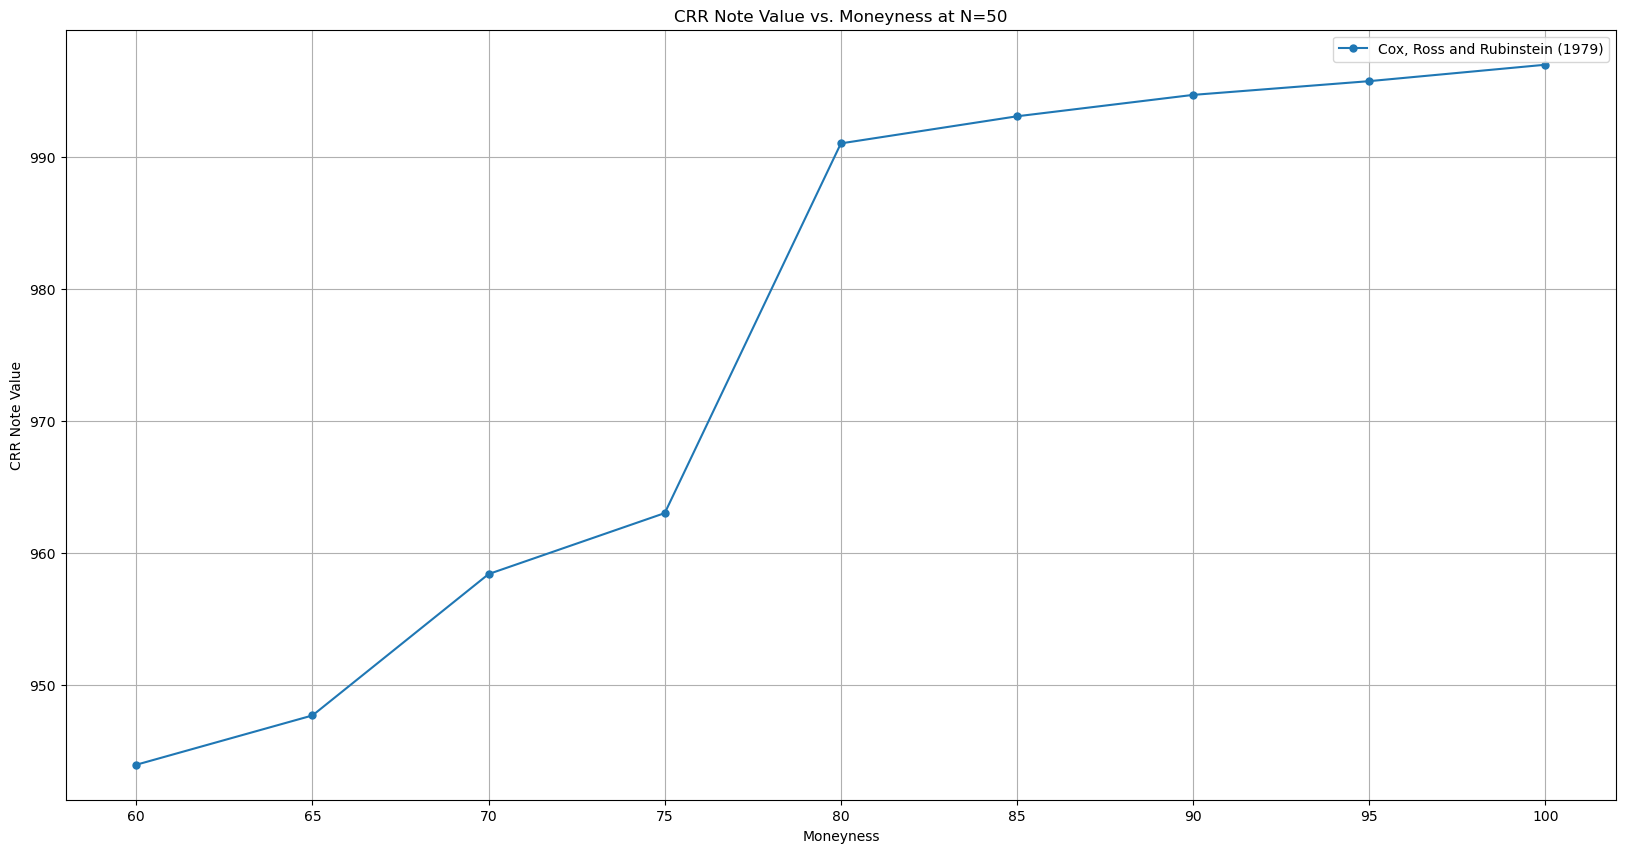

In [83]:
plt.figure(figsize=(20, 10))
plt.plot(df_l_crr['Moneyness'],df_l_crr['Note_Value'],'o-', markersize=5, label='Cox, Ross and Rubinstein (1979)')
plt.xlabel('Moneyness')
plt.ylabel('CRR Note Value')
plt.title('CRR Note Value vs. Moneyness at N=50')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
N = 9999

In [53]:
sig = [0.37779, 0.36529, 0.34846, 0.33187, 0.31841, 0.30770, 0.29896, 0.29334, 0.28662]

In [54]:
l_CRR = []
for i in sig:
    S, p, u, d, model = Stock_tree(N, S0, B, i, r1, D, T0_T2, model="CRR")
    note_value = Note_Value(S, p, N, i, T0_T2, T1_T3, r2, model)
    l_CRR.append(note_value)

The estimated fair value of the note at moneyness of 60.0 for 9999 time steps and CRR model is: $941.5477
The estimated fair value of the note at moneyness of 65.0 for 9999 time steps and CRR model is: $948.3446
The estimated fair value of the note at moneyness of 70.0 for 9999 time steps and CRR model is: $960.3284
The estimated fair value of the note at moneyness of 75.0 for 9999 time steps and CRR model is: $969.5891
The estimated fair value of the note at moneyness of 80.0 for 9999 time steps and CRR model is: $978.8840
The estimated fair value of the note at moneyness of 85.0 for 9999 time steps and CRR model is: $985.1034
The estimated fair value of the note at moneyness of 90.0 for 9999 time steps and CRR model is: $988.9398
The estimated fair value of the note at moneyness of 95.0 for 9999 time steps and CRR model is: $991.7623
The estimated fair value of the note at moneyness of 100.0 for 9999 time steps and CRR model is: $996.0410


In [55]:
avg_CRR = np.mean(l_CRR)
print(f"The estimated average value of the note for {N} time steps and {model} model is: ${avg_CRR:.4f}")

The estimated average value of the note for 9999 time steps and CRR model is: $973.3934


In [72]:
money_ness = range(60, 105, 5)
df_l_crr = pd.DataFrame({
    'Moneyness': money_ness,
    'Note_Value': l_CRR
})

df_l_crr = df_l_crr.reset_index(drop=True)
df_l_crr.head()

,Moneyness,Note_Value
0,60,941.547689
1,65,948.344569
2,70,960.328396
3,75,969.589121
4,80,978.884032


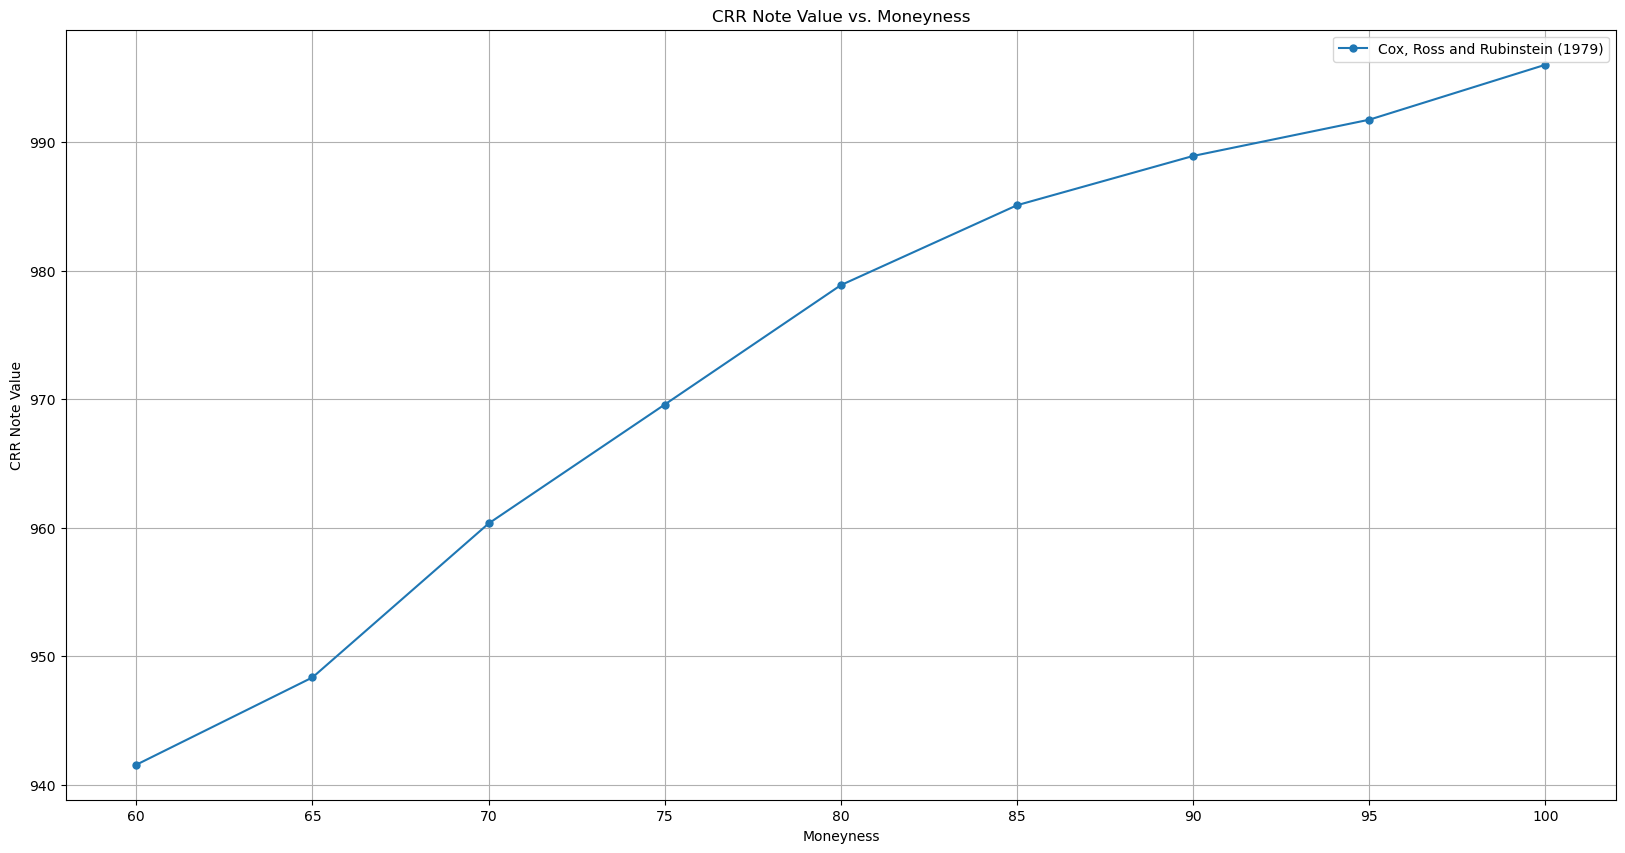

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df_l_crr['Moneyness'],df_l_crr['Note_Value'],'o-', markersize=5, label='Cox, Ross and Rubinstein (1979)')
plt.xlabel('Moneyness')
plt.ylabel('CRR Note Value')
plt.title('CRR Note Value vs. Moneyness at N=9999')
plt.legend()
plt.grid(True)
plt.show()

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">VI) Sensitivity Analysis w.r.t to different Moneyness(different implied volatility) for 'RB' model for N=50 and N=9999 ==></span>
</div>

In [84]:
N = 50

In [85]:
sig = [0.37779, 0.36529, 0.34846, 0.33187, 0.31841, 0.30770, 0.29896, 0.29334, 0.28662]

In [ ]:
l_RB_50 = []
for i in sig:
    S, p, u, d, model = Stock_tree(N, S0, B, i, r1, D, T0_T2, model="RB")
    note_value = Note_Value(S, p, N, i, T0_T2, T1_T3, r2, model)
    l_RB_50.append(note_value)

The estimated fair value of the note at moneyness of 60.0 for 50 time steps and RB model is: $947.5135
The estimated fair value of the note at moneyness of 65.0 for 50 time steps and RB model is: $953.9254
The estimated fair value of the note at moneyness of 70.0 for 50 time steps and RB model is: $959.5862
The estimated fair value of the note at moneyness of 75.0 for 50 time steps and RB model is: $963.3870
The estimated fair value of the note at moneyness of 80.0 for 50 time steps and RB model is: $987.1720
The estimated fair value of the note at moneyness of 85.0 for 50 time steps and RB model is: $990.2577
The estimated fair value of the note at moneyness of 90.0 for 50 time steps and RB model is: $993.4013
The estimated fair value of the note at moneyness of 95.0 for 50 time steps and RB model is: $996.3590
The estimated fair value of the note at moneyness of 100.0 for 50 time steps and RB model is: $998.4804


In [ ]:
money_ness = range(60, 105, 5)
df_l_rb = pd.DataFrame({
    'Moneyness': money_ness,
    'Note_Value': l_RB_50
})

df_l_rb = df_l_rb.reset_index(drop=True)
df_l_rb.head()

,Moneyness,Note_Value
0,60,947.513473
1,65,953.925388
2,70,959.586231
3,75,963.387033
4,80,987.171953


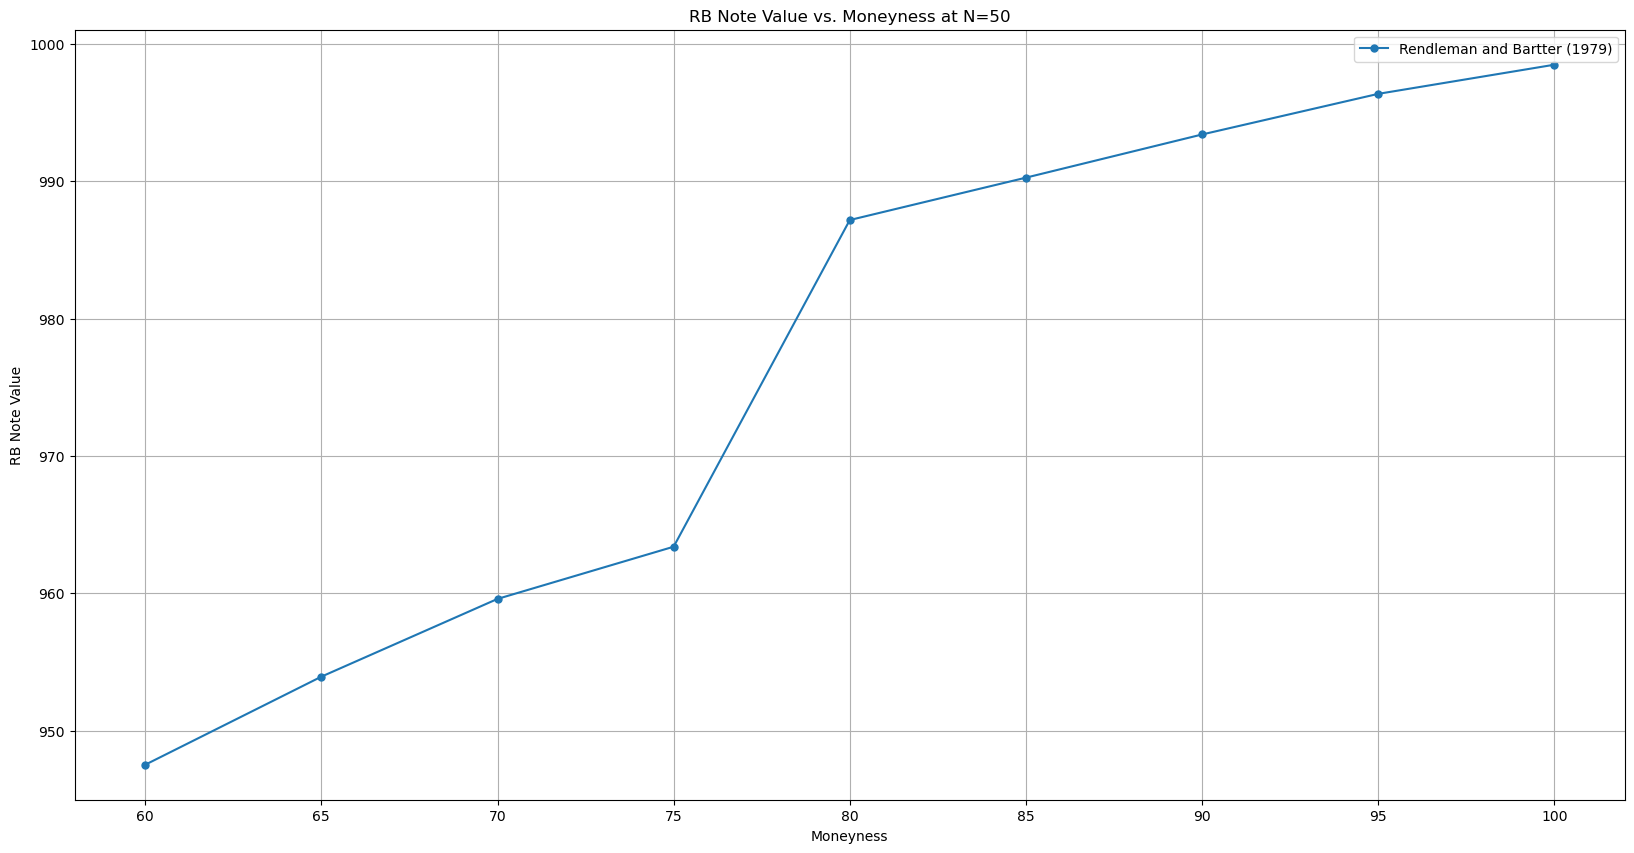

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(df_l_rb['Moneyness'],df_l_rb['Note_Value'],'o-', markersize=5, label='Rendleman and Bartter (1979)')
plt.xlabel('Moneyness')
plt.ylabel('RB Note Value')
plt.title('RB Note Value vs. Moneyness at N=50')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
N = 9999

In [95]:
sig = [0.37779, 0.36529, 0.34846, 0.33187, 0.31841, 0.30770, 0.29896, 0.29334, 0.28662]

In [96]:
l_RB = []
for i in sig:
    S, p, u, d, model = Stock_tree(N, S0, B, i, r1, D, T0_T2, model="RB")
    note_value = Note_Value(S, p, N, i, T0_T2, T1_T3, r2, model)
    l_RB.append(note_value)

The estimated fair value of the note at moneyness of 60.0 for 9999 time steps and RB model is: $940.5464
The estimated fair value of the note at moneyness of 65.0 for 9999 time steps and RB model is: $948.8116
The estimated fair value of the note at moneyness of 70.0 for 9999 time steps and RB model is: $959.6604
The estimated fair value of the note at moneyness of 75.0 for 9999 time steps and RB model is: $969.7969
The estimated fair value of the note at moneyness of 80.0 for 9999 time steps and RB model is: $978.5521
The estimated fair value of the note at moneyness of 85.0 for 9999 time steps and RB model is: $984.3070
The estimated fair value of the note at moneyness of 90.0 for 9999 time steps and RB model is: $989.2559
The estimated fair value of the note at moneyness of 95.0 for 9999 time steps and RB model is: $992.0137
The estimated fair value of the note at moneyness of 100.0 for 9999 time steps and RB model is: $995.9878


In [100]:
avg_RB = np.mean(l_RB)
print(f"The estimated average value of the note for {N} time steps and {model} model is: ${avg_RB:.4f}")

The estimated average value of the note for 9999 time steps and RB model is: $973.2146


In [101]:
df_l_rb = pd.DataFrame({
    'Moneyness': money_ness,
    'Note_Value': l_RB
})

df_l_rb = df_l_rb.reset_index(drop=True)
df_l_rb.head()

,Moneyness,Note_Value
0,60,940.546419
1,65,948.811552
2,70,959.660366
3,75,969.796906
4,80,978.552130


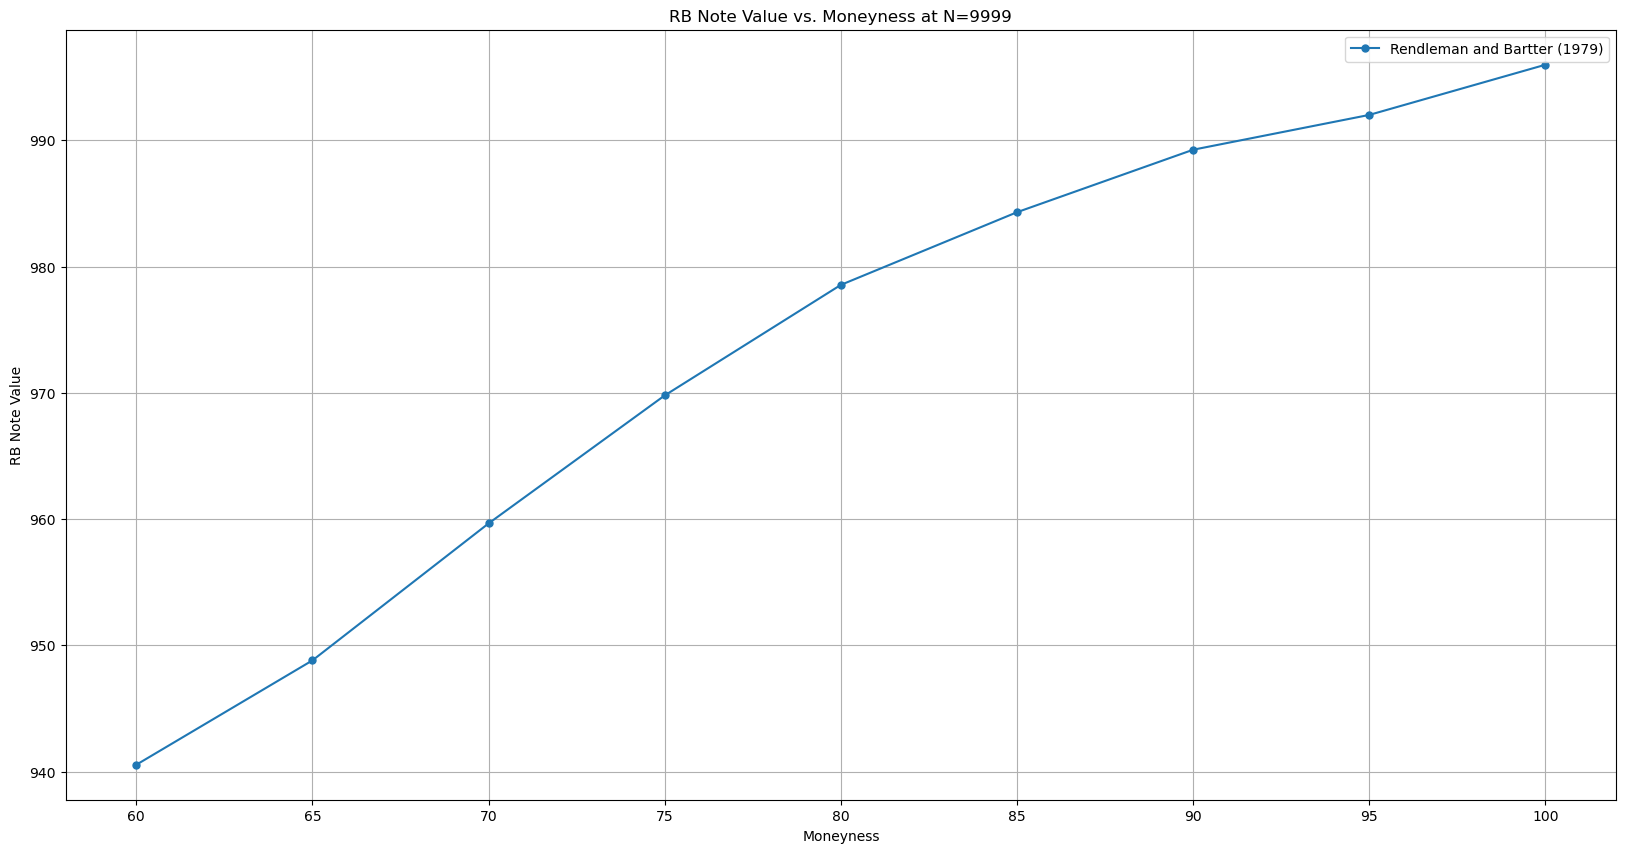

In [102]:
plt.figure(figsize=(20, 10))
plt.plot(df_l_rb['Moneyness'],df_l_rb['Note_Value'],'o-', markersize=5, label='Rendleman and Bartter (1979)')
plt.xlabel('Moneyness')
plt.ylabel('RB Note Value')
plt.title('RB Note Value vs. Moneyness at N=9999')
plt.legend()
plt.grid(True)
plt.show()

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">VII) Sensitivity Analysis w.r.t to different Moneyness(different implied volatility) for 'LR' model for N=50 and N=9999 ==></span>
</div>

In [116]:
N = 50

In [117]:
sig = [0.37779, 0.36529, 0.34846, 0.33187, 0.31841, 0.30770, 0.29896, 0.29334, 0.28662]

In [118]:
l_LR_50 = []
for i in sig:
    S, p, u, d, model = Stock_tree(N, S0, B, i, r1, D, T0_T2, model="LR")
    note_value = Note_Value(S, p, N, i, T0_T2, T1_T3, r2, model)
    l_LR_50.append(note_value)

The estimated fair value of the note at moneyness of 60.0 for 50 time steps and LR model is: $957.1311
The estimated fair value of the note at moneyness of 65.0 for 50 time steps and LR model is: $964.0785
The estimated fair value of the note at moneyness of 70.0 for 50 time steps and LR model is: $973.0252
The estimated fair value of the note at moneyness of 75.0 for 50 time steps and LR model is: $983.1598
The estimated fair value of the note at moneyness of 80.0 for 50 time steps and LR model is: $992.0672
The estimated fair value of the note at moneyness of 85.0 for 50 time steps and LR model is: $997.2636
The estimated fair value of the note at moneyness of 90.0 for 50 time steps and LR model is: $1000.9461
The estimated fair value of the note at moneyness of 95.0 for 50 time steps and LR model is: $1003.2505
The estimated fair value of the note at moneyness of 100.0 for 50 time steps and LR model is: $1005.9497


In [119]:
df_l_lr = pd.DataFrame({
    'Moneyness': money_ness,
    'Note_Value': l_LR_50
})

df_l_lr = df_l_lr.reset_index(drop=True)
df_l_lr.head()

,Moneyness,Note_Value
0,60,957.131050
1,65,964.078467
2,70,973.025171
3,75,983.159770
4,80,992.067213


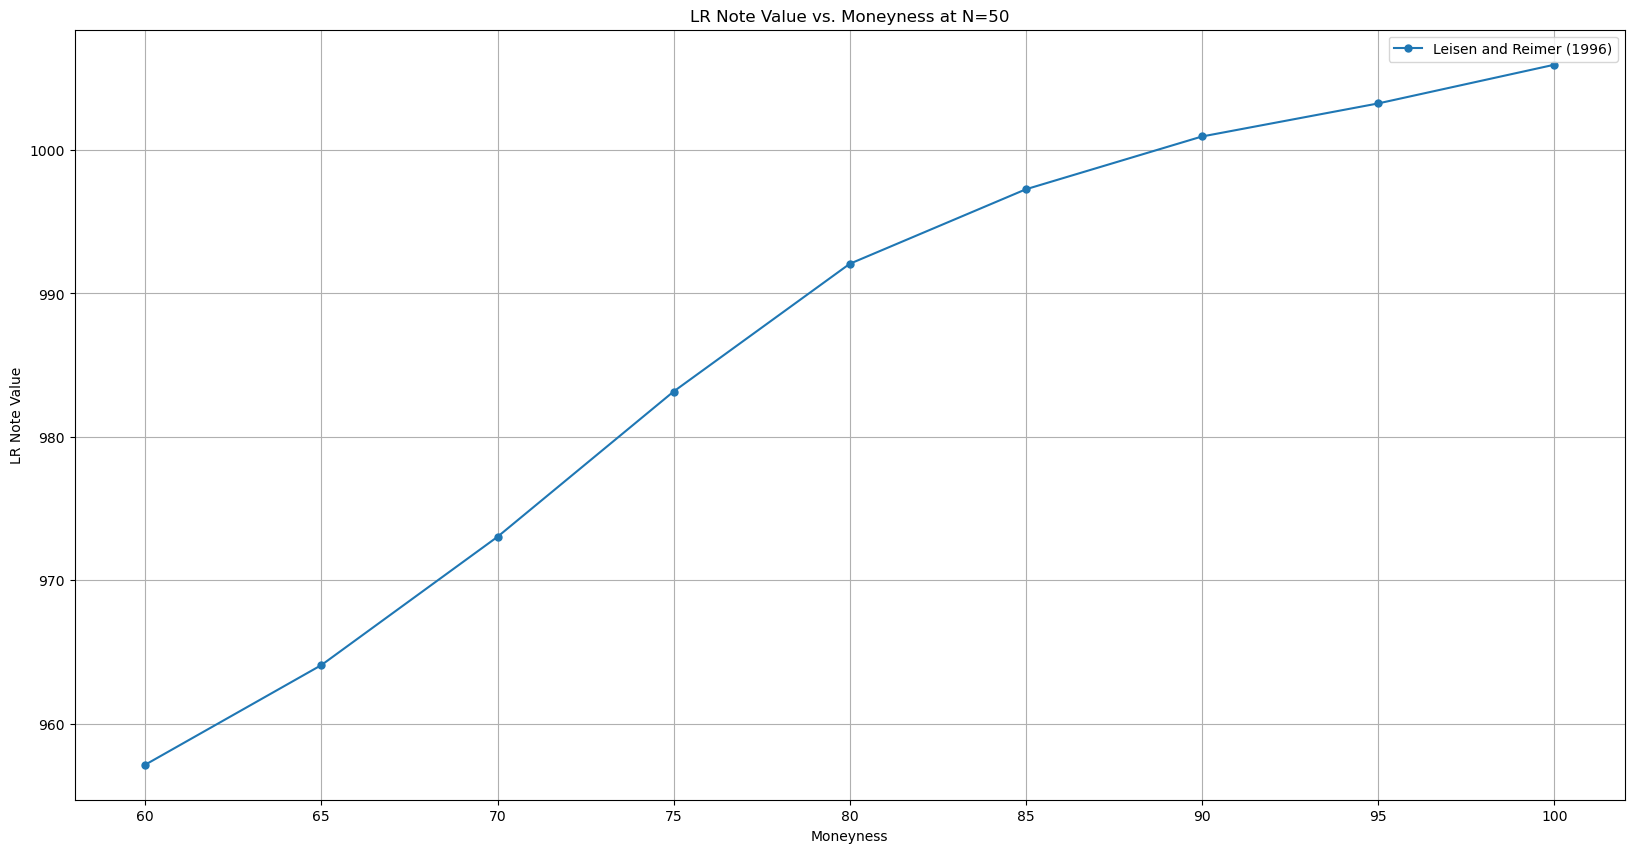

In [120]:
plt.figure(figsize=(20, 10))
plt.plot(df_l_lr['Moneyness'],df_l_lr['Note_Value'],'o-', markersize=5, label='Leisen and Reimer (1996)')
plt.xlabel('Moneyness')
plt.ylabel('LR Note Value')
plt.title('LR Note Value vs. Moneyness at N=50')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
l_LR = []
for i in sig:
    S, p, u, d, model = Stock_tree(N, S0, B, i, r1, D, T0_T2, model="LR")
    note_value = Note_Value(S, p, N, i, T0_T2, T1_T3, r2, model)
    l_LR.append(note_value)

The estimated fair value of the note at moneyness of 60.0 for 9999 time steps and LR model is: $941.0421
The estimated fair value of the note at moneyness of 65.0 for 9999 time steps and LR model is: $949.1577
The estimated fair value of the note at moneyness of 70.0 for 9999 time steps and LR model is: $959.7510
The estimated fair value of the note at moneyness of 75.0 for 9999 time steps and LR model is: $970.0834
The estimated fair value of the note at moneyness of 80.0 for 9999 time steps and LR model is: $978.3499
The estimated fair value of the note at moneyness of 85.0 for 9999 time steps and LR model is: $984.4764
The estimated fair value of the note at moneyness of 90.0 for 9999 time steps and LR model is: $989.4747
The estimated fair value of the note at moneyness of 95.0 for 9999 time steps and LR model is: $992.4789
The estimated fair value of the note at moneyness of 100.0 for 9999 time steps and LR model is: $995.9951


In [59]:
avg_LR = np.mean(l_LR)
print(f"The estimated average value of the note for {N} time steps and {model} model is: ${avg_LR:.4f}")

The estimated average value of the note for 9999 time steps and LR model is: $973.4233


In [121]:
df_l_lr = pd.DataFrame({
    'Moneyness': money_ness,
    'Note_Value': l_LR
})

df_l_lr = df_l_lr.reset_index(drop=True)
df_l_lr.head()

,Moneyness,Note_Value
0,60,941.042131
1,65,949.157662
2,70,959.751039
3,75,970.083393
4,80,978.349904


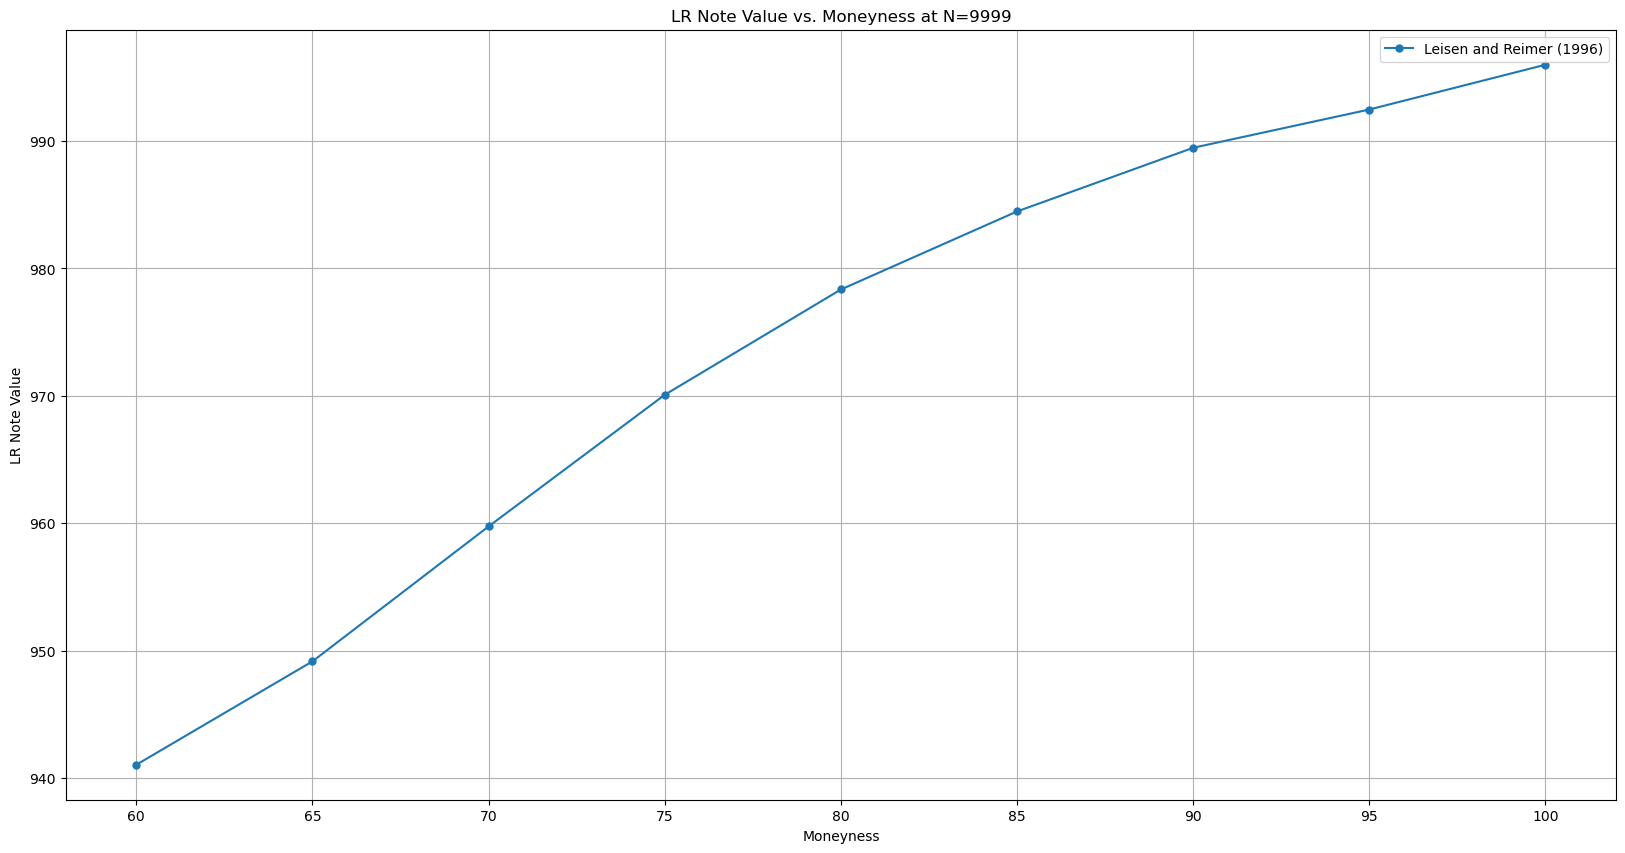

In [122]:
plt.figure(figsize=(20, 10))
plt.plot(df_l_lr['Moneyness'],df_l_lr['Note_Value'],'o-', markersize=5, label='Leisen and Reimer (1996)')
plt.xlabel('Moneyness')
plt.ylabel('LR Note Value')
plt.title('LR Note Value vs. Moneyness at N=9999')
plt.legend()
plt.grid(True)
plt.show()

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">VIII) Increasing the Number of Steps from 50 till 1000 and plotting the value graph for 80 Moneyness 'CRR' Model==></span>
</div>

In [62]:
N_values = range(50, 1000, 3)
CRR_values = []

for i in N_values:
    S, p, u, d, model = Stock_tree(i, S0, B, sigma, r1, D, T0_T2, model="CRR")
    note_value = Note_Value(S, p, i, sigma, T0_T2, T1_T3, r2, model)
    CRR_values.append(note_value)

The estimated fair value of the note at moneyness of 80.0 for 50 time steps and CRR model is: $991.0136
The estimated fair value of the note at moneyness of 80.0 for 53 time steps and CRR model is: $977.3653
The estimated fair value of the note at moneyness of 80.0 for 56 time steps and CRR model is: $984.3629
The estimated fair value of the note at moneyness of 80.0 for 59 time steps and CRR model is: $972.0450
The estimated fair value of the note at moneyness of 80.0 for 62 time steps and CRR model is: $979.5736
The estimated fair value of the note at moneyness of 80.0 for 65 time steps and CRR model is: $986.3261
The estimated fair value of the note at moneyness of 80.0 for 68 time steps and CRR model is: $977.1252
The estimated fair value of the note at moneyness of 80.0 for 71 time steps and CRR model is: $982.3546
The estimated fair value of the note at moneyness of 80.0 for 74 time steps and CRR model is: $971.3617
The estimated fair value of the note at moneyness of 80.0 for 77

In [63]:
df_crr = pd.DataFrame({
    'N': N_values,
    'Note_Value': CRR_values
})

# Add better column names and reset index if needed
df_crr = df_crr.reset_index(drop=True)
df_crr.head()

,N,Note_Value
0,50,991.013577
1,53,977.365317
2,56,984.362861
3,59,972.045046
4,62,979.573647


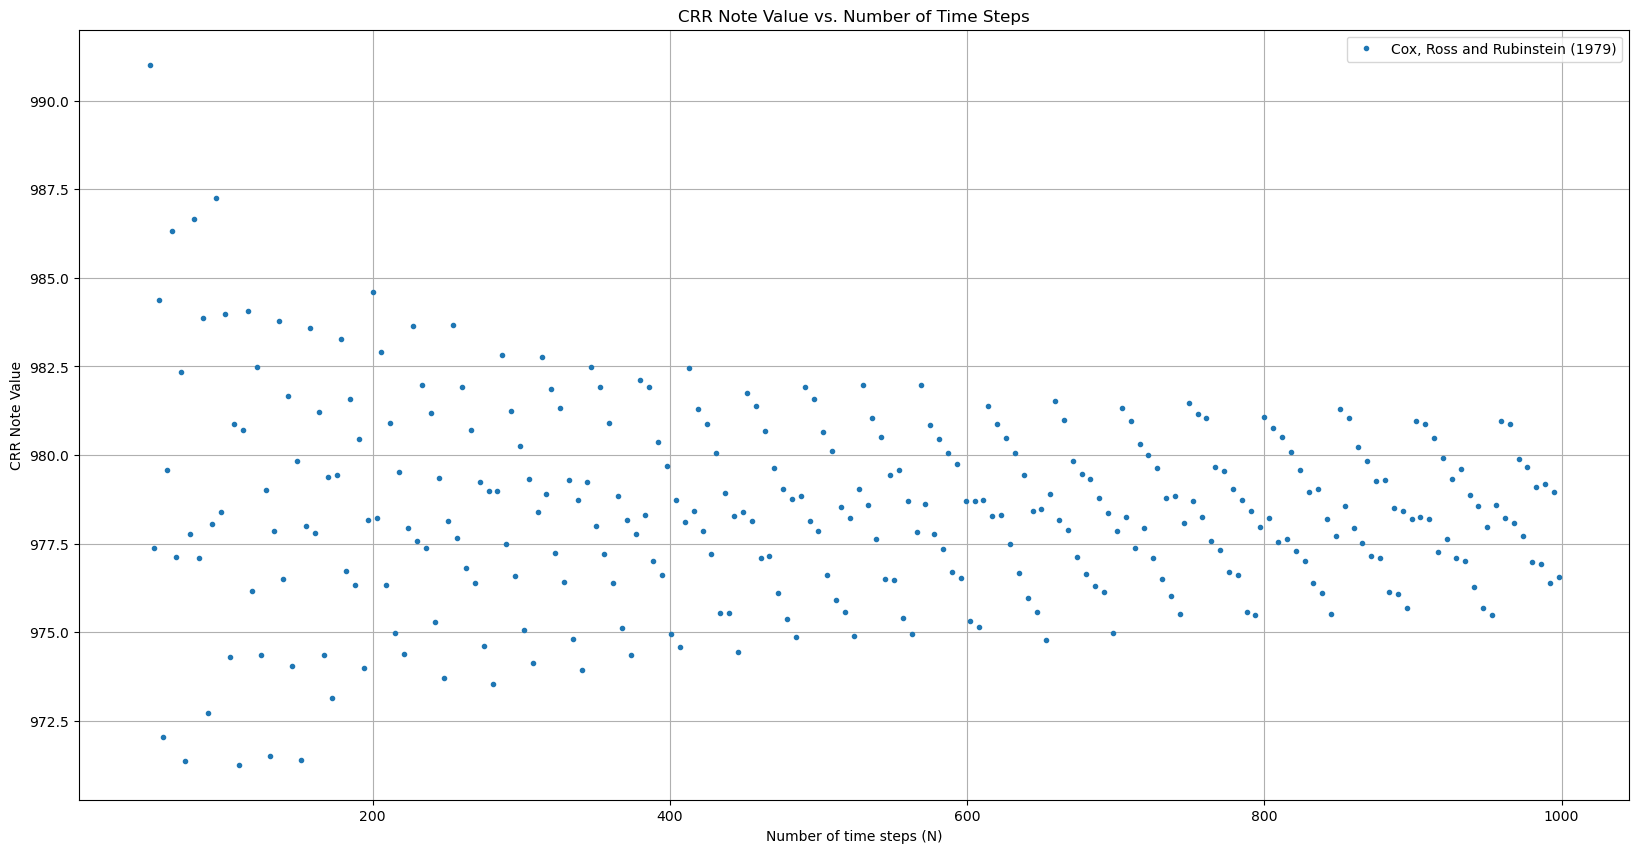

In [64]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_crr['N'],df_crr['Note_Value'],'o', markersize=3, label='Cox, Ross and Rubinstein (1979)')
plt.xlabel('Number of time steps (N)')
plt.ylabel('CRR Note Value')
plt.title('CRR Note Value vs. Number of Time Steps')
plt.legend()
plt.grid(True)
plt.show()

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">IX) Increasing the Number of Steps from 50 till 1000 and plotting the value graph for 80 Moneyness 'RB' Model==></span>
</div>

In [65]:
N_values = range(50, 1000, 3)
RB_values = []

for i in N_values:
    S, p, u, d, model = Stock_tree(i, S0, B, sigma, r1, D, T0_T2, model="RB")
    note_value = Note_Value(S, p, i, sigma, T0_T2, T1_T3, r2, model)
    RB_values.append(note_value)

The estimated fair value of the note at moneyness of 80.0 for 50 time steps and RB model is: $987.1720
The estimated fair value of the note at moneyness of 80.0 for 53 time steps and RB model is: $975.3254
The estimated fair value of the note at moneyness of 80.0 for 56 time steps and RB model is: $984.7267
The estimated fair value of the note at moneyness of 80.0 for 59 time steps and RB model is: $972.5020
The estimated fair value of the note at moneyness of 80.0 for 62 time steps and RB model is: $980.1165
The estimated fair value of the note at moneyness of 80.0 for 65 time steps and RB model is: $970.3487
The estimated fair value of the note at moneyness of 80.0 for 68 time steps and RB model is: $977.1904
The estimated fair value of the note at moneyness of 80.0 for 71 time steps and RB model is: $985.8739
The estimated fair value of the note at moneyness of 80.0 for 74 time steps and RB model is: $975.7457
The estimated fair value of the note at moneyness of 80.0 for 77 time ste

In [66]:
df_rb = pd.DataFrame({
    'N': N_values,
    'Note_Value': RB_values
})

# Add better column names and reset index if needed
df_rb = df_rb.reset_index(drop=True)
df_rb.head()

,N,Note_Value
0,50,987.171953
1,53,975.325351
2,56,984.726675
3,59,972.501981
4,62,980.116536


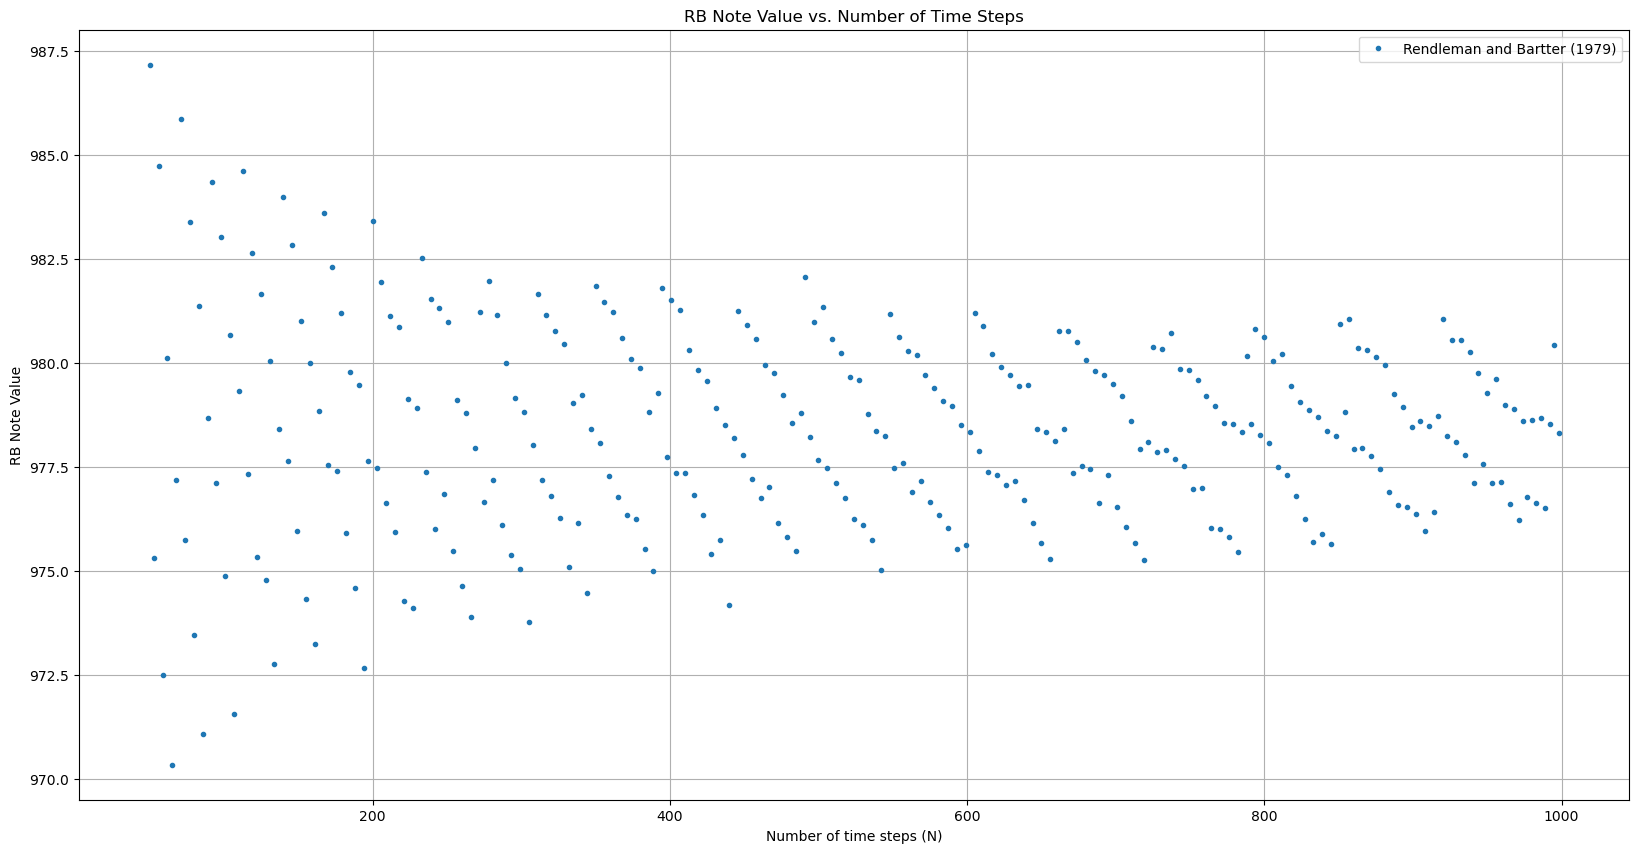

In [67]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_rb['N'],df_rb['Note_Value'],'o', markersize=3, label='Rendleman and Bartter (1979)')
plt.xlabel('Number of time steps (N)')
plt.ylabel('RB Note Value')
plt.title('RB Note Value vs. Number of Time Steps')
plt.legend()
plt.grid(True)
plt.show()

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">X) Increasing the Number of Steps from 50 till 1000 and plotting the value graph for 80 Moneyness 'LR' Model==></span>
</div>

In [69]:
N_values = range(50, 1000, 3)
LR_values = []

for i in N_values:
    S, p, u, d, model = Stock_tree(i, S0, B, sigma, r1, D, T0_T2, model="LR")
    note_value = Note_Value(S, p, i, sigma, T0_T2, T1_T3, r2, model)
    LR_values.append(note_value)

The estimated fair value of the note at moneyness of 80.0 for 50 time steps and LR model is: $992.0672
The estimated fair value of the note at moneyness of 80.0 for 53 time steps and LR model is: $981.1540
The estimated fair value of the note at moneyness of 80.0 for 56 time steps and LR model is: $989.3399
The estimated fair value of the note at moneyness of 80.0 for 59 time steps and LR model is: $979.9436
The estimated fair value of the note at moneyness of 80.0 for 62 time steps and LR model is: $989.1566
The estimated fair value of the note at moneyness of 80.0 for 65 time steps and LR model is: $979.1375
The estimated fair value of the note at moneyness of 80.0 for 68 time steps and LR model is: $987.3525
The estimated fair value of the note at moneyness of 80.0 for 71 time steps and LR model is: $978.5384
The estimated fair value of the note at moneyness of 80.0 for 74 time steps and LR model is: $986.6814
The estimated fair value of the note at moneyness of 80.0 for 77 time ste

In [70]:
df_lr = pd.DataFrame({
    'N': N_values,
    'Note_Value': LR_values
})
# Add better column names and reset index if needed
df_lr = df_lr.reset_index(drop=True)
df_lr.head()

,N,Note_Value
0,50,992.067213
1,53,981.153977
2,56,989.339922
3,59,979.943634
4,62,989.156642


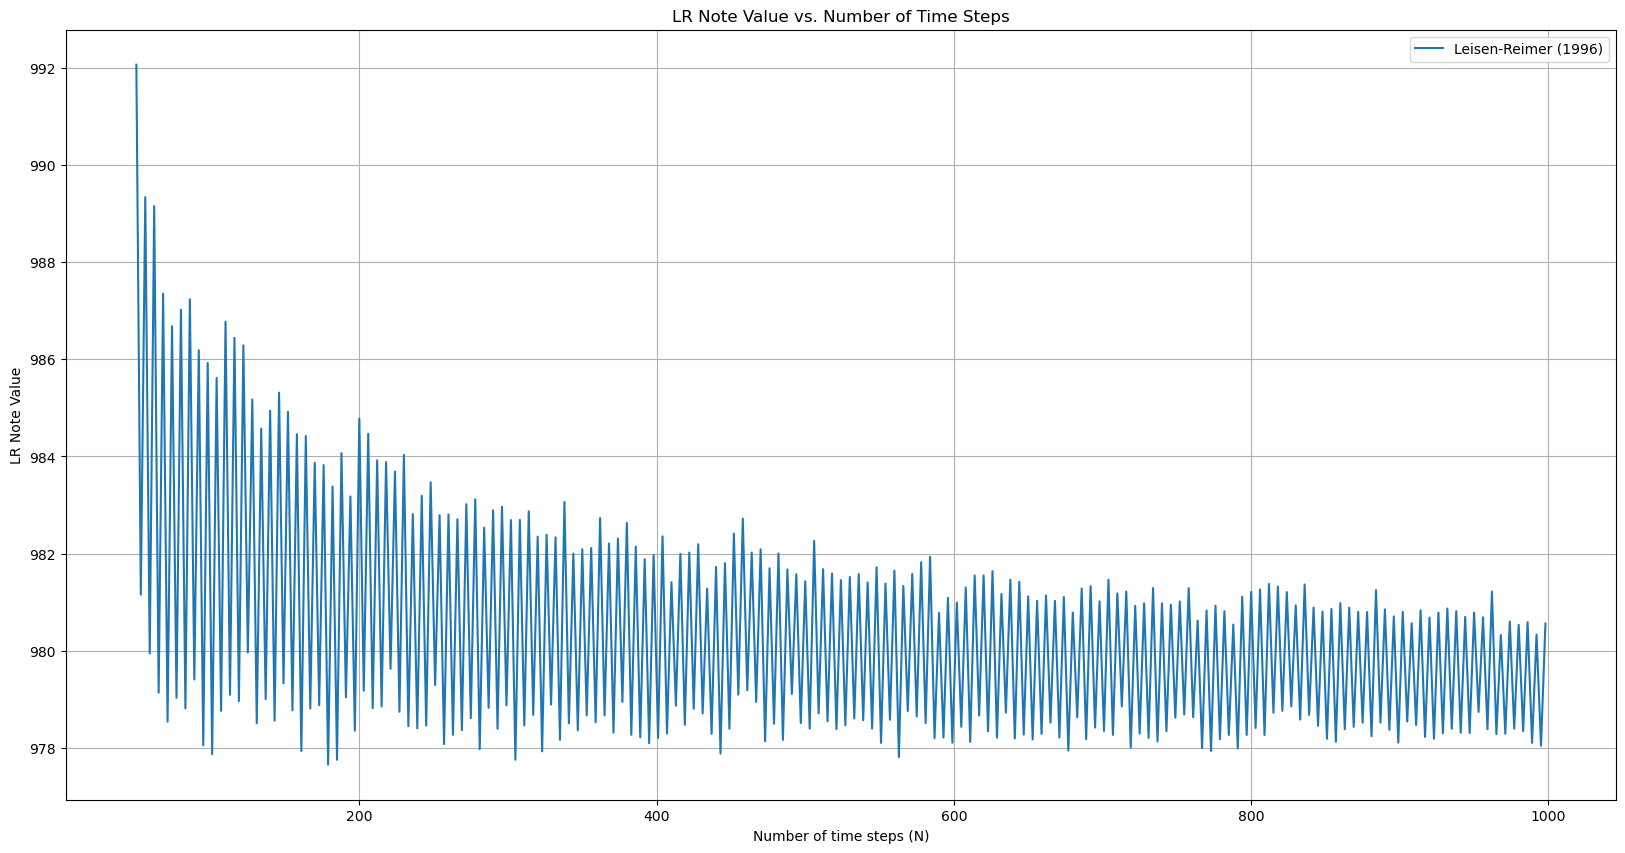

In [71]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_lr['N'],df_lr['Note_Value'], label='Leisen-Reimer (1996)')
plt.xlabel('Number of time steps (N)')
plt.ylabel('LR Note Value')
plt.title('LR Note Value vs. Number of Time Steps')
plt.legend()
plt.grid(True)
plt.show()

---

<div style="border-bottom: 2px solid black; display: inline-block; text-align: center; margin: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">End of Project 1</span>
</div>

---